<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_4'

In [4]:
os.listdir(base_path)

['data_add_delta_4_n250.csv',
 'data_add_delta_4_n120.csv',
 'data_add_delta_4_n60.csv',
 'data_add_delta_4_n30.csv',
 'data_add_delta_4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,46.618130,20.363204,81.525810,73.996439,630.531065,863.034648,478.639581,384.395067
1,0.0,1.0,47.719628,95.028013,24.234370,78.266683,877.370011,1132.618705,-1720.990143,2853.608849
2,0.0,2.0,31.816817,45.075351,76.616594,30.778568,790.763588,985.050919,-1882.577816,2867.628735
3,0.0,3.0,23.667437,57.473468,86.476190,89.383914,1724.443076,1991.444085,-306.274226,2297.718311
4,0.0,4.0,69.936671,41.101853,72.409115,71.959295,769.902220,1035.309155,1654.850963,-619.541809
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,85.789062,68.050593,77.253638,82.356379,-6011.681605,-5688.231932,-580.355358,-5107.876574
29996,999.0,26.0,47.578304,92.771994,26.475545,23.508997,2972.783476,3173.118316,301.470472,2871.647844
29997,999.0,27.0,33.401175,51.023667,32.012516,33.377347,2395.782951,2555.597655,1671.227886,884.369769
29998,999.0,28.0,28.291593,84.855560,93.809746,83.069493,6794.770050,7094.796442,715.701879,6379.094563


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,46.618130,20.363204,81.525810,73.996439,630.531065,863.034648,478.639581,384.395067
1,0.0,1.0,47.719628,95.028013,24.234370,78.266683,877.370011,1132.618705,-1720.990143,2853.608849
2,0.0,2.0,31.816817,45.075351,76.616594,30.778568,790.763588,985.050919,-1882.577816,2867.628735
3,0.0,3.0,23.667437,57.473468,86.476190,89.383914,1724.443076,1991.444085,-306.274226,2297.718311
4,0.0,4.0,69.936671,41.101853,72.409115,71.959295,769.902220,1035.309155,1654.850963,-619.541809
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,85.789062,68.050593,77.253638,82.356379,-6011.681605,-5688.231932,-580.355358,-5107.876574
29996,999.0,26.0,47.578304,92.771994,26.475545,23.508997,2972.783476,3173.118316,301.470472,2871.647844
29997,999.0,27.0,33.401175,51.023667,32.012516,33.377347,2395.782951,2555.597655,1671.227886,884.369769
29998,999.0,28.0,28.291593,84.855560,93.809746,83.069493,6794.770050,7094.796442,715.701879,6379.094563


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    46.618130  20.363204  81.525810  73.996439   630.531065   
      1.0    47.719628  95.028013  24.234370  78.266683   877.370011   
      2.0    31.816817  45.075351  76.616594  30.778568   790.763588   
      3.0    23.667437  57.473468  86.476190  89.383914  1724.443076   
      4.0    69.936671  41.101853  72.409115  71.959295   769.902220   
...                ...        ...        ...        ...          ...   
999.0 25.0   85.789062  68.050593  77.253638  82.356379 -6011.681605   
      26.0   47.578304  92.771994  26.475545  23.508997  2972.783476   
      27.0   33.401175  51.023667  32.012516  33.377347  2395.782951   
      28.0   28.291593  84.855560  93.809746  83.069493  6794.770050   
      29.0   86.564311  33.368746  60.383585  51.831925  -711.885812   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     863.034648   478.639581   384.395067  
      1.0    1132.618705 -1720.990143  2853.608849  
      2.0     985.050919 -1882.577816  2867.628735  
      3.0    1991.444085  -306.274226  2297.718311  
      4.0    1035.309155  1654.850963  -619.541809  
...                  ...          ...          ...  
999.0 25.0  -5688.231932  -580.355358 -5107.876574  
      26.0   3173.118316   301.470472  2871.647844  
      27.0   2555.597655  1671.227886   884.369769  
      28.0   7094.796442   715.701879  6379.094563  
      29.0   -469.737245  -302.708571  -167.028673  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    46.618130  20.363204  81.525810  73.996439   630.531065   
      1.0    47.719628  95.028013  24.234370  78.266683   877.370011   
      2.0    31.816817  45.075351  76.616594  30.778568   790.763588   
      3.0    23.667437  57.473468  86.476190  89.383914  1724.443076   
      4.0    69.936671  41.101853  72.409115  71.959295   769.902220   
...                ...        ...        ...        ...          ...   
999.0 25.0   85.789062  68.050593  77.253638  82.356379 -6011.681605   
      26.0   47.578304  92.771994  26.475545  23.508997  2972.783476   
      27.0   33.401175  51.023667  32.012516  33.377347  2395.782951   
      28.0   28.291593  84.855560  93.809746  83.069493  6794.770050   
      29.0   86.564311  33.368746  60.383585  51.831925  -711.885812   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     863.034648   478.639581   384.395067  
      1.0    1132.618705 -1720.990143  2853.608849  
      2.0     985.050919 -1882.577816  2867.628735  
      3.0    1991.444085  -306.274226  2297.718311  
      4.0    1035.309155  1654.850963  -619.541809  
...                  ...          ...          ...  
999.0 25.0  -5688.231932  -580.355358 -5107.876574  
      26.0   3173.118316   301.470472  2871.647844  
      27.0   2555.597655  1671.227886   884.369769  
      28.0   7094.796442   715.701879  6379.094563  
      29.0   -469.737245  -302.708571  -167.028673  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,46.618130,20.363204,81.525810,73.996439,630.531065,863.034648,478.639581,384.395067
1,0.0,1.0,47.719628,95.028013,24.234370,78.266683,877.370011,1132.618705,-1720.990143,2853.608849
2,0.0,2.0,31.816817,45.075351,76.616594,30.778568,790.763588,985.050919,-1882.577816,2867.628735
3,0.0,3.0,23.667437,57.473468,86.476190,89.383914,1724.443076,1991.444085,-306.274226,2297.718311
4,0.0,4.0,69.936671,41.101853,72.409115,71.959295,769.902220,1035.309155,1654.850963,-619.541809
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,85.789062,68.050593,77.253638,82.356379,-6011.681605,-5688.231932,-580.355358,-5107.876574
29996,999.0,26.0,47.578304,92.771994,26.475545,23.508997,2972.783476,3173.118316,301.470472,2871.647844
29997,999.0,27.0,33.401175,51.023667,32.012516,33.377347,2395.782951,2555.597655,1671.227886,884.369769
29998,999.0,28.0,28.291593,84.855560,93.809746,83.069493,6794.770050,7094.796442,715.701879,6379.094563


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    46.618130  20.363204  81.525810  73.996439   630.531065   
      1.0    47.719628  95.028013  24.234370  78.266683   877.370011   
      2.0    31.816817  45.075351  76.616594  30.778568   790.763588   
      3.0    23.667437  57.473468  86.476190  89.383914  1724.443076   
      4.0    69.936671  41.101853  72.409115  71.959295   769.902220   
...                ...        ...        ...        ...          ...   
999.0 25.0   85.789062  68.050593  77.253638  82.356379 -6011.681605   
      26.0   47.578304  92.771994  26.475545  23.508997  2972.783476   
      27.0   33.401175  51.023667  32.012516  33.377347  2395.782951   
      28.0   28.291593  84.855560  93.809746  83.069493  6794.770050   
      29.0   86.564311  33.368746  60.383585  51.831925  -711.885812   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0     863.034648   478.639581   384.395067  
      1.0    1132.618705 -1720.990143  2853.608849  
      2.0     985.050919 -1882.577816  2867.628735  
      3.0    1991.444085  -306.274226  2297.718311  
      4.0    1035.309155  1654.850963  -619.541809  
...                  ...          ...          ...  
999.0 25.0  -5688.231932  -580.355358 -5107.876574  
      26.0   3173.118316   301.470472  2871.647844  
      27.0   2555.597655  1671.227886   884.369769  
      28.0   7094.796442   715.701879  6379.094563  
      29.0   -469.737245  -302.708571  -167.028673  

[30000 rows x 8 columns]

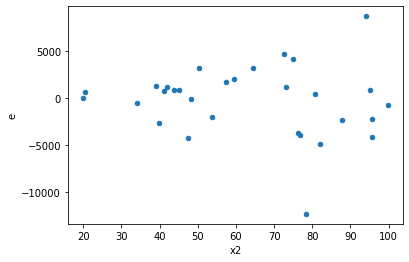

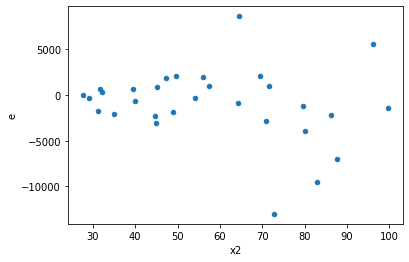

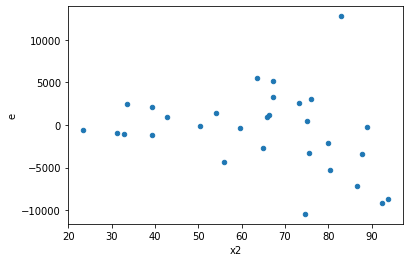

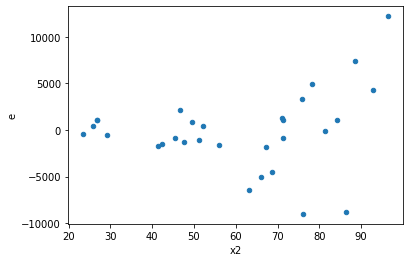

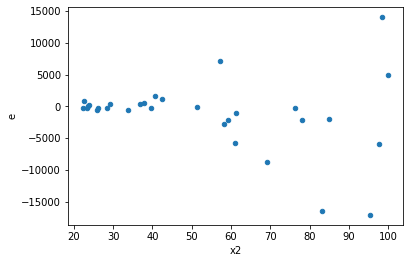

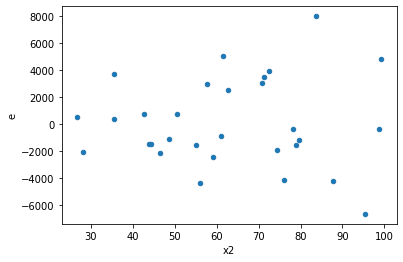

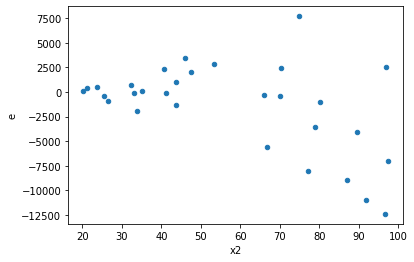

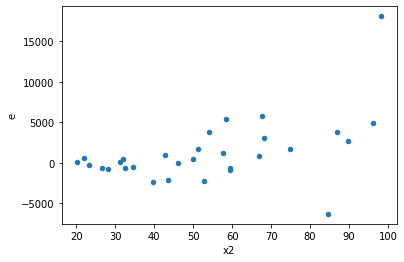

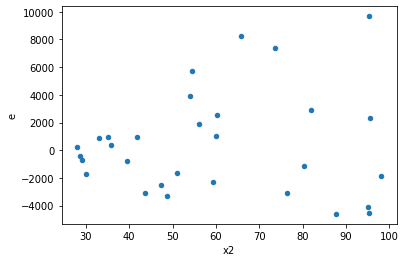

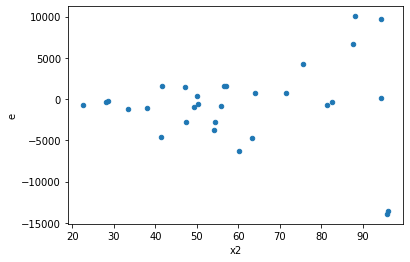

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,8.0,8.0,35652926.7583909,264858497.91135117,4456615.844798863,33107312.238918897,7.428800998757187,0.010296919894366763,0.9948515400528166,0.005148459947183381,Reject001=1 : Homoscedasticity
5.0,8.0,8.0,45213468.7745215,62161210.95850725,5651683.5968151875,7770151.369813406,1.3748383533345725,0.6632044130963193,0.6683977934518404,0.33160220654815964,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,5212648.92739874,231513860.0785607,651581.1159248425,28939232.50982009,44.41386007441953,1.5602924160251774e-05,0.9999921985379199,7.801462080125887e-06,Reject001=0 : Heteroscedasticity
8.0,8.0,8.0,26249341.67647592,277499428.03719085,3281167.70955949,34687428.50464886,10.571671909238002,0.0031511968403443724,0.9984244015798278,0.0015755984201721862,Reject001=0 : Heteroscedasticity
10.0,8.0,8.0,162710400.06200352,215444296.7789695,20338800.00775044,26930537.097371187,1.3240966569860981,0.7008150426428137,0.6495924786785932,0.35040752132140685,Reject001=1 : Homoscedasticity
11.0,8.0,8.0,68742636.48839451,337416719.34013045,8592829.561049314,42177089.917516306,4.908405271844569,0.03723971339095078,0.9813801433045246,0.01861985669547539,Reject001=1 : Homoscedasticity
13.0,8.0,8.0,223343254.36495823,805530357.7476909,27917906.79561978,100691294.71846136,3.606692129735868,0.08819496453421127,0.9559025177328944,0.04409748226710564,Reject001=1 : Homoscedasticity
16.0,8.0,8.0,11633690.271102557,337896312.651491,1454211.2838878196,42237039.08143637,29.044637151017053,7.923347607263764e-05,0.9999603832619637,3.961673803631882e-05,Reject001=0 : Heteroscedasticity
17.0,8.0,8.0,16307680.32384965,94193214.04142551,2038460.0404812063,11774151.755178189,5.776003218782125,0.02282949693797587,0.9885852515310121,0.011414748468987934,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,155268291.30283606,98644414.99050859,19408536.412854508,12330551.873813573,0.6353159048946576,0.5357207624480256,Reject001=1 : Homoscedasticity
1.0,8.0,8.0,144724392.16147834,60921299.2022358,18090549.020184793,7615162.400279475,0.42094700342055663,0.242437024188351,Reject001=1 : Homoscedasticity
2.0,8.0,8.0,164834577.4848519,158722478.14002743,20604322.185606487,19840309.76750343,0.9629197985150527,0.9586921471289255,Reject001=1 : Homoscedasticity
3.0,8.0,8.0,35652926.7583909,264858497.91135117,4456615.844798863,33107312.238918897,7.428800998757187,0.010296919894366763,Reject001=1 : Homoscedasticity
4.0,8.0,8.0,380021383.6542589,53286543.213352814,47502672.95678236,6660817.901669102,0.14021985473804963,0.011751731812764211,Reject001=1 : Homoscedasticity
5.0,8.0,8.0,45213468.7745215,62161210.95850725,5651683.5968151875,7770151.369813406,1.3748383533345725,0.6632044130963193,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,142692593.02254447,21109961.634199016,17836574.12781806,2638745.204274877,0.14794013611388912,0.013954699252003891,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,5212648.92739874,231513860.0785607,651581.1159248425,28939232.50982009,44.41386007441953,1.5602924160251774e-05,Reject001=0 : Heteroscedasticity
8.0,8.0,8.0,26249341.67647592,277499428.03719085,3281167.70955949,34687428.50464886,10.571671909238002,0.0031511968403443724,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      738
Reject001=0 : Heteroscedasticity    262
Name: Result_test, dtype: int64